# Tutorial Beddoes-Leishman Model

#### Created in May 2020 by:   
Prof. Carlos Ferreira  
Chair Wind Energy Science  
TUDelft, Faculty of Aerospace Engineering  

#### Learning objectives:
The student will learn how to implement a simplified version of the Beddoes-Leishman dynamic stall model, and its four sub-models/algorithms:

-   Unsteady attached flow module

-   Non-linear trailing-edge separation module

-   Leading-edge flow separation module

-   Vortex shedding and lift module


In [1]:
# Here we import import the python libraries we will use
import matplotlib.pyplot as plt
# import matplotlib.colors as colors
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# from matplotlib.transforms import Bbox
# import matplotlib

## Recall reduced time and reduced frequency

For the case of a periodic perturbation with a frequency $\omega$ in
$\left[rad/s\right]$ applied to an airfoil of chord $c$ and reference
wind speed $U_\infty$, we can scale the perturbation as a reduced
frequency $k$ .

$$\label{eq:reduced_frequency}
k=\frac{\omega c}{2 U_\infty}$$

A period of time can be scaled as semi-chord lengths travelled by the
unperturbed flow, as a reduced time $s$

$$\label{eq:reduced_time}
s=\frac{2 t U_\infty}{c}$$




In [2]:
def time2semichord(time):
    return 2*Uinf*time/chord

def semichord2time(s):
    return s/2/Uinf*chord


## Definition of the case study

The unsteady airfoil aerodynamics will approached by the incompressible
potential flow flat-plate theory.

The loss of thickness leads to an error cancellation cancellation such
that the lift slope of the potential flow flat-plate is similar to that
of common thick airfoils in attached flow.

We will consider a flat plate in motion in a flow $U_\infty$ in
$x$-direction, where the motion can be decomposed in angle of attack
$\alpha$, a pitching motion with a pitch rate
$\frac{\rm{d} \theta}{\rm{d} t}$ around the quarter-chord position, and
a plunge motion in $y$-direction with a speed
$\frac{\rm{d} h}{\rm{d} t}$.

We will define the 2D force normal to $U_\infty$ as $F_n$ and the
coefficient $C_n$ as

$$\label{eq:normal_force_coefficient_flat_plate}
C_n=\frac{F_n}{\frac{1}{2} \rho U_\infty^2 c}$$

where $\rho$ is the fluid density and $c$ is the chord of the flat
plate.



In [3]:
# define properties of the system
dt=.1
time =np.arange(0,500,dt)
Uinf=1

# properties of the airfoil
chord=1 # chord of the airfoil
dCn_dalpha=2.0*np.pi # lift slope
alpha0=0.0*np.pi # alpha for which normal load is zero in steady flow

# pitching motion of the airfoil
k=.1 # reduced frequency of the pitching motion
omega=k*2/chord*Uinf # frequency of the piching motion
Amplitude_alpha=10/180*np.pi # amplitude of the pitching motion
alpha_t0=15/180*np.pi # alpha at time=0
alpha=Amplitude_alpha*np.sin(omega*time)+alpha_t0 # calculate alpha
dalpha_dt=np.gradient(alpha,time) # calculate the time derivative of alpha


# plunge motion of the airfoil
k_plg=.0 # reduced frequency of the plunge motion
omega_plg=k_plg*2/chord*Uinf # frequency of the plunge motion
Amplitude_plg=.3 # amplitude of the plunge motion
hplg=Amplitude_plg*np.sin(omega_plg*time) #position
dhplg_dt=np.gradient(hplg,time) # plunge velocity



# define the array semi-chord time scale
sarray = time2semichord(time)

## Unsteady attached flow module

The unsteady attached flow module is composed of

-  Quasi-steady 2D flat-plate aerodynamics  

-  Calculation of the unsteady normal force


### Quasi-steady 2D flat-plate aerodynamics

#### Assumption: small angles of attack

Assuming small angles of attack, $C_n$ can be approximated in potential-flow flat-plate theory by

\begin{equation}
\label{eq:normal_force_coefficient_flat_plate_angle_attack}
C_n= 2 \pi\left( \sin\left( \alpha \right) +
\frac{c}{2U_\infty}\frac{ \rm{d} \theta}{ \rm{d} t} - \frac{1}{U_\infty}\frac{ \rm{d} h}{ \rm{d} t}\cos\left( \alpha \right) \right)    
\approx 2 \pi \left( \alpha + c\frac{ \rm{d} \theta}{U_\infty \rm{d} t} - \frac{ \rm{d} h}{U_\infty \rm{d} t} \right)
\end{equation}   


We now define the subscript quasi-steady $qs$ for quasi-steady solutions, and $\alpha_{qs}$ as

\begin{equation}
\label{eq:quasi-steady_angle_attack}
\alpha_{qs} = \left( \alpha + c\frac{ \rm{d} \theta}{2U_\infty \rm{d} t} - \frac{ \rm{d} h}{U_\infty \rm{d} t} \right)
\end{equation}

The lift slope is approximated to $\frac{\rm{d} C_l}{\rm{d}\alpha}=2 \pi$

We can then rewrite the Equation as

\begin{equation}
\label{eq:Cn_quasi_steady_angle_attack}
C_{n_{qs}}=\frac{\rm{d} C_l}{\rm{d}\alpha} \left( \alpha + c\frac{ \rm{d} \theta}{2 U_\infty \rm{d} t} - \frac{ \rm{d} h}{U_\infty \rm{d} t} \right)= \frac{\rm{d} C_l}{\rm{d}\alpha} \alpha_{qs}
\end{equation}


#### Assumption: linear-effect of camber

For airfoils with camber, we introduce the angle for which $C_n$ is null, named $\alpha_0$. We further develop Equation above into Equation:

\begin{equation}
\label{eq:Cn_qs_alfa_camb_plate}
C_{n_{qs}}= \frac{\rm{d} C_l}{\rm{d}\alpha} \left( \alpha_{qs} - \alpha_0 \right)
\end{equation}


### Calculation and plot of quasi-steady aerodynamics, effective quasi-steady angle of attack and force coefficient

In [4]:
# calculate quasi-steady alpha
# alpha0 = 0 # we define the \alpha_{0}, zero for the case of an uncambered plate/airfoil
alphaqs = alpha + dalpha_dt*(chord/2)/Uinf - dhplg_dt/Uinf
dalphaqs_dt=np.gradient(alphaqs,time) # calculate the time derivative of the quasi-steady alpha

# calculate the coefficient of normal force assuming quasi-steady flow asuming potential flow
Cnormal_quasisteady = 2*np.pi*(alphaqs-alpha0)

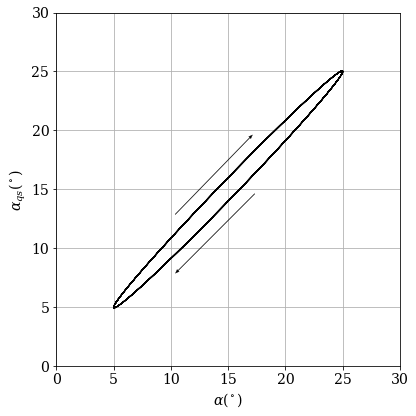

In [5]:
# we plot the effective quasi-steady angle of attack \alpha_{qs}

# plot figure
plt.rcParams.update({'font.size': 14}) #, 'figure.dpi':150, 'savefig.dpi':150})
plt.rcParams["font.family"] = "serif" # define font
plt.rcParams["mathtext.fontset"] = "dejavuserif"  # define font
cmap = plt.get_cmap('BuGn')  # define colormap
fig,ax = plt.subplots(figsize=[6,6]) # define pointers for the figure and axes
ax.plot(alpha*180/np.pi, alphaqs*180/np.pi,color='black', linewidth=1) # plot equivalent quasi-steady angle of attack
ax.set_xlabel(r'$\alpha (^\circ)$') # set x-label
ax.set_ylabel(r'$\alpha_{qs} (^\circ)$') # set y-label
# add arrows to indicate the direction of the cycle
parr1=ax.annotate('', xy=(17.5, 20), xytext=(10,12.5), 
            arrowprops=dict(color='black', shrink=0.05, width=.5, headwidth=3,headlength=4, linewidth=.2))
parr1=ax.annotate('', xy=(10, 7.5), xytext=(17.7,15), 
            arrowprops=dict(color='black', shrink=0.05, width=.5, headwidth=3,headlength=4, linewidth=.2))
plt.grid() # add a grid 
ax.set_xlim(0,30) # define limits of the axis
ax.set_ylim(0,30) # define limits of the axis
plt.tight_layout() # all elements of figure inside plot area
plt.show() # show figure

filename = 'figures/alpha_quasi_steady' # define name of the figure to be saved
fig.savefig(filename+'.svg', pad_inches = 0) # save figure
fig.savefig(filename+'.pdf',pad_inches = 0) # save figure
fig.savefig(filename+'.png', pad_inches = 0, dpi=300) # save figure



The figure above presents the loop of equivalent quasi-steady angle of attack $\alpha_{qs}$ for the case of a flat plate pitching in a sinusoidal motion $\alpha=5^\circ \sin(\omega t)+15^\circ$, with $\omega=k\frac{2 c}{Uinf}$, with $k=0.1$. The pitching axis is at the quarter-chord.

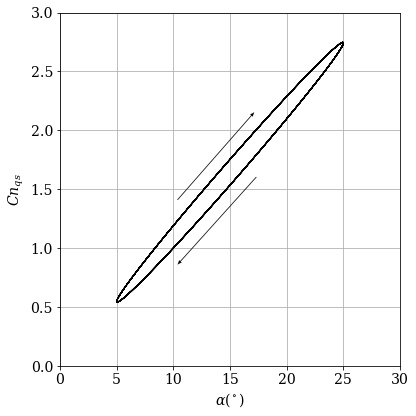

In [6]:
# we plot the quasi-steady normal-force coefficient

# plot figure
plt.rcParams.update({'font.size': 14}) #, 'figure.dpi':150, 'savefig.dpi':150})
plt.rcParams["font.family"] = "serif" # define font
plt.rcParams["mathtext.fontset"] = "dejavuserif"  # define font
cmap = plt.get_cmap('BuGn')  # define colormap
fig,ax = plt.subplots(figsize=[6,6]) # define pointers for the figure and axes
ax.plot(alpha*180/np.pi, Cnormal_quasisteady,color='black', linewidth=1) # plot equivalent quasi-steady angle of attack
ax.set_xlabel(r'$\alpha (^\circ)$') # set x-label
ax.set_ylabel(r'$Cn_{qs} $') # set y-label
# add arrows to indicate the direction of the cycle
parr1=ax.annotate('', xy=(17.5, 20/360*4*np.pi**2), xytext=(10,12.5/360*4*np.pi**2), 
            arrowprops=dict(color='black', shrink=0.05, width=.5, headwidth=3,headlength=4, linewidth=.2))
parr1=ax.annotate('', xy=(10, 7.5/360*4*np.pi**2), xytext=(17.7,15/360*4*np.pi**2), 
            arrowprops=dict(color='black', shrink=0.05, width=.5, headwidth=3,headlength=4, linewidth=.2))
plt.grid() # add a grid 
ax.set_xlim(0,30) # define limits of the axis
ax.set_ylim(0,3) # define limits of the axis
plt.tight_layout() # all elements of figure inside plot area
plt.show() # show figure

filename = 'figures/Cnormal_quasisteady' # define name of the figure to be saved
fig.savefig(filename+'.svg', pad_inches = 0) # save figure
fig.savefig(filename+'.pdf',pad_inches = 0) # save figure
fig.savefig(filename+'.png', pad_inches = 0, dpi=300) # save figure



The figure above presents the loop of equivalent quasi-steady normal-force coefficient  $Cn_{qs}$ for the case of a flat plate pitching in a sinusoidal motion $\alpha=5^\circ \sin(\omega t)+15^\circ$, with $\omega=k\frac{2 c}{Uinf}$, with $k=0.1$. The pitching axis is at the quarter-chord.

## Calculation of the unsteady normal force

As the boundary conditions over the airfoil change dynamically, the
aerodynamic loads change dynamically and the flow is accelerated.
Therefore, the flow conditions are different from quasi-steady flow
conditions and also are the loads. The aerodynamic loads will differ
from the quasi-steady solution in both amplitude and phase.

The aerodynamics load can then be decomposed in two types: circulatory
loads, and non-circulatory loads (also called added mass effects).

Circulatory loads are the result of the force field that creates a net
circulation over the surface of the airfoil, while non-circulatory loads
are associated with a acceleration of the flow but do not change the
circulation over the airfoil.



### Duhamel's superposition integral of indicial step responses


The circulatory load $C_{n_c}$ for an airfoil is computed
in the time by applying Duhamel’s superposition integral of indicial step
responses of step changes of the quasi-steady loading, as given by Equation:

\begin{equation}
\label{eq:duhamel_integral}
C_{n_c \left(s\right)} = \frac{\rm{d} C_l}{\rm{d}\alpha}\left( \alpha_{qs \left(0\right)}\phi_{\left(s\right)}+\int_0^s \frac{\rm{d}\alpha_{qs}}{\rm{d}t}\phi_{\left(s-\sigma\right)}\rm{d}\sigma  -\alpha_0 \right)
\end{equation}

where once again
\begin{equation}
s=\frac{2 t U_\infty}{c}
\end{equation}

The indicial response $\phi_{\left(s\right)}$ is the ratio between the unsteady circulatory normal loading and the steady solution, upon a step change in quasi-steady loading. We need now to define a form for this function.



### Wagner's function for the indicial response

Wagner proposed an analytical solution for the indicial response of a incompressible potential flow flat-plate to a step change in angle of attack. The solution can be approximated by Equation

\begin{equation}
\label{eq:Wagner_approximate}
\phi_{\left(s \right)} =1 - A_1 e^{-b_1 s} - A_2 e^{-b_2 s}
\end{equation}

where $A_1=0.165$,$b_1=0.045$,$A_2=0.335$,$b_2=0.3$

We can combine the equations above to define an expression for an algorithm to determine $C_{n_c \left(s\right)}$.

\begin{equation}
\label{eq:duhamel_circulatory_normal_force}
C_{n_c \left(s\right)} = \frac{\rm{d} C_l}{\rm{d}\alpha}\left(\alpha_{E \left(s\right)} - \alpha_0 \right)
\end{equation}

$\alpha_{E \left(s\right)}$ is the equivalent angle of attack that accounts for the lag due to wake effects.


### Determining $\alpha_{E \left(s\right)}$


$\alpha_{E \left(s\right)}$ can be determined from the following set of equations

\begin{align}
\alpha_{E \left(s\right)}=\alpha_{qs \left(s\right)} - X_{lag \left(s\right)}- Y_{lag \left(s\right)} \\\\
X_{lag \left(s\right)}=X_{lag \left(s-\Delta s\right)}e^{-b_1 \Delta s}+ \Delta \alpha_{qs \left(s\right)} A_1 e^{-b_1 \frac{\Delta s}{2}}\\\\
Y_{lag \left(s\right)}=Y_{lag \left(s-\Delta s\right)}e^{-b_2 \Delta s}+ \Delta \alpha_{qs \left(s\right)} A_2 e^{-b_2 \frac{\Delta s}{2}}
\end{align}


In [7]:
# determining X and Y terms for recursive marching formula for approximation of Duhamel's integral 
def duhamel_approx(Xi,Yi,delta_s,delta_alpha,order=2,A1=0.3,A2=0.7,b1=0.14,b2=0.53):
    # A1=0.165,A2=0.335,b1=0.0455,b2=0.3
    # determine the next values of X and Y, named Xip1 and Yip1
    if order==1:
        Xip1= Xi*np.exp(-b1*delta_s)+A1*delta_alpha
        Yip1= Yi*np.exp(-b2*delta_s)+A2*delta_alpha
    elif order==2:
        Xip1= Xi*np.exp(-b1*delta_s)+A1*delta_alpha*np.exp(-b1*delta_s/2)
        Yip1= Yi*np.exp(-b2*delta_s)+A2*delta_alpha*np.exp(-b2*delta_s/2)        
    else:
        Xip1= Xi*np.exp(-b1*delta_s)+A1*delta_alpha*((1+4*np.exp(-b1*delta_s/2)+np.exp(-b1*delta_s))/6)
        Yip1= Yi*np.exp(-b2*delta_s)+A2*delta_alpha*((1+4*np.exp(-b2*delta_s/2)+np.exp(-b2*delta_s))/6)
    
    return Xip1,Yip1


# define function for circulatory force, potential flow
def circulatory_normal_force(dCn_dalpha,alpha_equivalent,alpha0):
    return dCn_dalpha*(alpha_equivalent-alpha0)

### Time marching the solution of the unsteady equivalent angle of attack $\alpha_{E \left(s\right)}$ and unsteady circulatory load coefficient $Cn_c$

In this section, we will time-march the solution of the unsteady equivalent angle of attack $\alpha_{E \left(s\right)}$ and unsteady circulatory load coefficient $Cn_c$. 

In [8]:
# define arrays for X,Y and alpha_equivalent
Xarray=np.zeros(np.shape(time))
Yarray=np.zeros(np.shape(time))

# define the array of alpha_equivalent
alpha_equivalent=np.zeros(np.shape(time))
alpha_equivalent[0]=alphaqs[0]

# march solution in time for alpha_E
for i,val in enumerate(time[:-1]):
    Xarray[i+1],Yarray[i+1]=duhamel_approx(Xarray[i],Yarray[i],sarray[i+1]-sarray[i],alphaqs[i+1]-alphaqs[i])

alpha_equivalent=alphaqs-Xarray-Yarray


We will now plot a comparison of the static angle of attack $\alpha$, the effective quasi-steady angle of attack $\alpha_{qs}$ and the unsteady equivalent angle of attack $\alpha_{c}$.

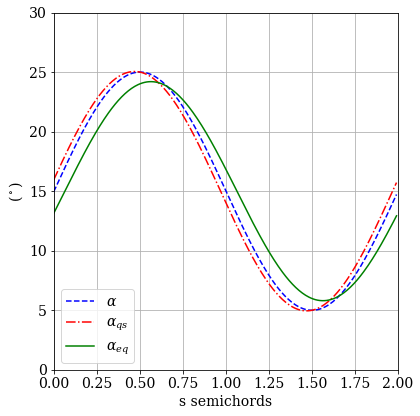

In [9]:
# plot solutions of test of duhamel_approx

# plot figure
plt.rcParams.update({'font.size': 14}) #, 'figure.dpi':150, 'savefig.dpi':150})
plt.rcParams["font.family"] = "serif" # define font
plt.rcParams["mathtext.fontset"] = "dejavuserif" # define font
cmap = plt.get_cmap('BuGn') # define colormap
fig,ax = plt.subplots(figsize=[6,6]) # define pointers for figure and axes


#we will only plot the last cycle
Ncycles = np.floor(time[-1]*omega/(2*np.pi)) # determine number of cycles
n_of_cycle = time*omega/(2*np.pi) # calculate the phase of the different points of the cycle
i1=np.argmin(np.abs(n_of_cycle-(Ncycles-1))) # index of start of cycle plotted
i2=np.argmin(np.abs(n_of_cycle-(Ncycles-.5))) # index of 180 degrees
i3=np.argmin(np.abs(n_of_cycle-(Ncycles))) # index of 360 degrees

# plot last cycle of the simulation, steady, quasi-steady and unsteady equivalent angle of attack 
ax.plot(time2semichord(n_of_cycle[i1:i3]-n_of_cycle[i1]), alpha[i1:i3]*180/np.pi,color='blue',linestyle='--', label=r'$\alpha$')
ax.plot(time2semichord(n_of_cycle[i1:i3]-n_of_cycle[i1]), alphaqs[i1:i3]*180/np.pi,color='red',linestyle='-.', label=r'$\alpha_{qs}$')
ax.plot(time2semichord(n_of_cycle[i1:i3]-n_of_cycle[i1]), alpha_equivalent[i1:i3]*180/np.pi,color='green',linestyle='-', label=r'$\alpha_{eq}$')
ax.set_xlabel('s semichords') # set x-label
ax.set_ylabel(r'$(^\circ)$') # set y-label
ax.set_xlim(0,2) # define limits of the axis
ax.set_ylim(0,30) # define limits of the axis
ax.grid() # add grid
ax.legend(loc='lower left')
plt.tight_layout() # all elements of figure inside plot area
plt.show() # show figure



filename = 'figures/comparison_alpha_st_qs_circ' # define name of the figure to be saved
fig.savefig(filename+'.svg', pad_inches = 0) # save figure
fig.savefig(filename+'.pdf',pad_inches = 0) # save figure
fig.savefig(filename+'.png', pad_inches = 0, dpi=300) # save figure



The figure above shows a comparison of the static angle of attack $\alpha$, the effective quasi-steady angle of attack $\alpha_{qs}$ and the unsteady equivalent angle of attack $\alpha_{c}$. The effect of considerign unsteady aerodynamics is very important, as it results in a significant phase delay and damping.

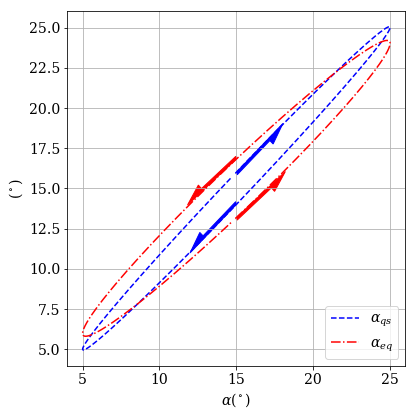

In [10]:
# plot figure
plt.rcParams.update({'font.size': 14}) #, 'figure.dpi':150, 'savefig.dpi':150})
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
cmap = plt.get_cmap('BuGn')
fig,ax = plt.subplots(figsize=[6,6])

#we will only plot the last cycle
Ncycles = np.floor(time[-1]*omega/(2*np.pi))
n_of_cycle = time*omega/(2*np.pi) # calculate the phase of the different points of the cycle
i1=np.argmin(np.abs(n_of_cycle-(Ncycles-1))) # index of start of cycle plotted
i2=np.argmin(np.abs(n_of_cycle-(Ncycles-.5))) # index of 180 degrees
i3=np.argmin(np.abs(n_of_cycle-(Ncycles))) # index of 360 degrees


ax.plot(alpha[i1:i3]*180/np.pi, alphaqs[i1:i3]*180/np.pi,color='blue',linestyle='--', label=r'$\alpha_{qs}$')
ax.plot(alpha[i1:i3]*180/np.pi, alpha_equivalent[i1:i3]*180/np.pi,color='red',linestyle='dashdot', label=r'$\alpha_{eq}$')


# we will plot arrows to see the direction of the cycle
scale_arrow=3 # scale od arrow
dx = (alpha[i1]-alpha[i1-1]) # dx of arrow
dy = (alphaqs[i1]-alphaqs[i1-1])  # dy of arrow   
ax.arrow(alpha[i1]*180/np.pi, alphaqs[i1]*180/np.pi, 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='blue', width=scale_arrow*.1, shape='left') # plot arrow at 0 degrees of cycle
dx = (alpha[i2]-alpha[i2-1]) # dx of arrow
dy = (alphaqs[i2]-alphaqs[i2-1])  # dy of arrow   
ax.arrow(alpha[i2]*180/np.pi, alphaqs[i2]*180/np.pi, 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='blue', width=scale_arrow*.1, shape='left') # plot arrow at 0 degrees of cycle


dx = (alpha[i1]-alpha[i1-1]) # dx of arrow
dy = (alpha_equivalent[i1]-alpha_equivalent[i1-1])  # dy of arrow   
ax.arrow(alpha[i1]*180/np.pi, alpha_equivalent[i1]*180/np.pi, 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='red', width=scale_arrow*.1, shape='left') # plot arrow at 0 degrees of cycle
dx = (alpha[i2]-alpha[i2-1]) # dx of arrow
dy = (alpha_equivalent[i2]-alpha_equivalent[i2-1])  # dy of arrow   
ax.arrow(alpha[i2]*180/np.pi, alpha_equivalent[i2]*180/np.pi, 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='red', width=scale_arrow*.1, shape='left') # plot arrow at 0 degrees of cycle

# ax.set_aspect(aspect=40.0)
ax.set_xlabel(r'$\alpha (^\circ)$')
ax.set_ylabel(r'$ (^\circ)$')
# ax.set_xlim(0,time.max())
ax.legend(loc='lower right')
plt.grid()
plt.tight_layout() # all elements of figure inside plot area

plt.show()

filename = 'figures/comparison_cycle_alpha_qs_circ' # define name of the figure to be saved
fig.savefig(filename+'.svg', pad_inches = 0) # save figure
fig.savefig(filename+'.pdf',pad_inches = 0) # save figure
fig.savefig(filename+'.png', pad_inches = 0, dpi=300) # save figure


The figure above shows the quasi-steady angle of attack $\alpha_{qs}$ and the equivalent unsteady angle of attack $\alpha_{eq}$ as a function of geometric angle of attack $\alpha$ for the case of a pitching airfoil. The arrows show the direction of the cycle. Note that between the quasi-steady solution $\alpha_{qs}$ and the unsteady solution $\alpha_{eq}$ there is a significant phase shift and damping.

We can now use the results of the figures above to calculate the normal load coefficients for the cases steady flow $Cn_{st}$, quasi-steady $Cn_{qs}$ and the circualtory term of the unsteady normal load coefficient $Cn_{c}$.

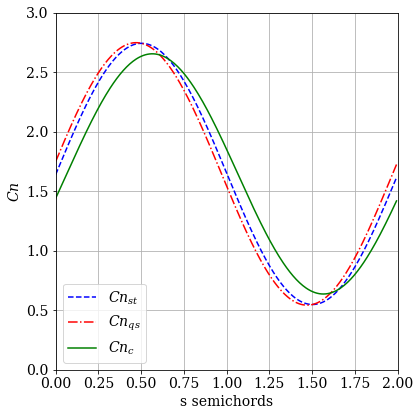

In [11]:
# plot solutions of test of duhamel_approx

# plot figure
plt.rcParams.update({'font.size': 14}) #, 'figure.dpi':150, 'savefig.dpi':150})
plt.rcParams["font.family"] = "serif" # define font
plt.rcParams["mathtext.fontset"] = "dejavuserif" # define font
cmap = plt.get_cmap('BuGn') # define colormap
fig,ax = plt.subplots(figsize=[6,6]) # define pointers for figure and axes


#we will only plot the last cycle
Ncycles = np.floor(time[-1]*omega/(2*np.pi)) # determine number of cycles
n_of_cycle = time*omega/(2*np.pi) # calculate the phase of the different points of the cycle
i1=np.argmin(np.abs(n_of_cycle-(Ncycles-1))) # index of start of cycle plotted
i2=np.argmin(np.abs(n_of_cycle-(Ncycles-.5))) # index of 180 degrees
i3=np.argmin(np.abs(n_of_cycle-(Ncycles))) # index of 360 degrees

# plot last cycle of the simulation, steady, quasi-steady and unsteady normal force coefficient  
ax.plot(time2semichord(n_of_cycle[i1:i3]-n_of_cycle[i1]), 
        circulatory_normal_force(2*np.pi,alpha[i1:i3],0),color='blue',linestyle='--', label=r'$Cn_{st}$')
ax.plot(time2semichord(n_of_cycle[i1:i3]-n_of_cycle[i1]), 
        circulatory_normal_force(2*np.pi,alphaqs[i1:i3],0),color='red',linestyle='-.', label=r'$Cn_{qs}$')
ax.plot(time2semichord(n_of_cycle[i1:i3]-n_of_cycle[i1]), 
        circulatory_normal_force(2*np.pi,alpha_equivalent[i1:i3],0),color='green',linestyle='-', label=r'$Cn_{c}$')
ax.set_xlabel('s semichords') # set x-label
ax.set_ylabel(r'$Cn$') # set y-label
ax.set_xlim(0,2) # define limits of the axis
ax.set_ylim(0,3) # define limits of the axis
ax.grid() # add grid
ax.legend(loc='lower left')
plt.tight_layout() # all elements of figure inside plot area
plt.show() # show figure



filename = 'figures/comparison_Cn_st_qs_circ' # define name of the figure to be saved
fig.savefig(filename+'.svg', pad_inches = .0) # save figure
fig.savefig(filename+'.pdf',pad_inches = .0) # save figure
fig.savefig(filename+'.png', pad_inches = .0, dpi=300) # save figure

The figure above shows a comparison of the normal load coefficients for the cases steady flow $Cn_{st}$, quasi-steady $Cn_{qs}$ and the circualtory term of the unsteady normal load coefficient $Cn_{c}$. Once again, you can see the The effect of considerign unsteady aerodynamics in phase delay and damping.

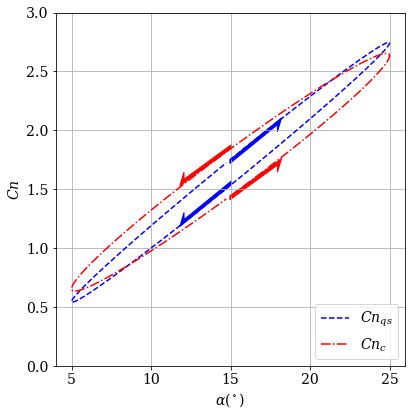

In [12]:
# plot figure
plt.rcParams.update({'font.size': 14}) #, 'figure.dpi':150, 'savefig.dpi':150})
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
cmap = plt.get_cmap('BuGn')
fig,ax = plt.subplots(figsize=[6,6])

#we will only plot the last cycle
Ncycles = np.floor(time[-1]*omega/(2*np.pi))
n_of_cycle = time*omega/(2*np.pi) # calculate the phase of the different points of the cycle
i1=np.argmin(np.abs(n_of_cycle-(Ncycles-1))) # index of start of cycle plotted
i2=np.argmin(np.abs(n_of_cycle-(Ncycles-.5))) # index of 180 degrees
i3=np.argmin(np.abs(n_of_cycle-(Ncycles))) # index of 360 degrees


ax.plot(alpha[i1:i3]*180/np.pi, 
        circulatory_normal_force(2*np.pi,alphaqs[i1:i3],0),color='blue',linestyle='--', label=r'$Cn_{qs}$')
ax.plot(alpha[i1:i3]*180/np.pi, 
        circulatory_normal_force(2*np.pi,alpha_equivalent[i1:i3],0),color='red',linestyle='dashdot', label=r'$Cn_{c}$')


# we will plot arrows to see the direction of the cycle
scale_arrow=3 # scale od arrow
dx = (alpha[i1]-alpha[i1-1])*180/np.pi # dx of arrow
dy = circulatory_normal_force(2*np.pi,(alphaqs[i1]-alphaqs[i1-1]),0)  # dy of arrow   
ax.arrow(alpha[i1]*180/np.pi, circulatory_normal_force(2*np.pi,alphaqs[i1],0), 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='blue', width=scale_arrow*.02,shape='left') # plot arrow at 0 degrees of cycle
dx = (alpha[i2]-alpha[i2-1])*180/np.pi # dx of arrow
dy = circulatory_normal_force(2*np.pi,(alphaqs[i2]-alphaqs[i2-1]),0)  # dy of arrow   
ax.arrow(alpha[i2]*180/np.pi, circulatory_normal_force(2*np.pi,alphaqs[i2],0), 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='blue', width=scale_arrow*.02,shape='left') # plot arrow at 0 degrees of cycle


dx = (alpha[i1]-alpha[i1-1])*180/np.pi # dx of arrow
dy = circulatory_normal_force(2*np.pi,(alpha_equivalent[i1]-alpha_equivalent[i1-1]),0)  # dy of arrow   
ax.arrow(alpha[i1]*180/np.pi, circulatory_normal_force(2*np.pi,alpha_equivalent[i1],0), 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='red', width=scale_arrow*.02, shape='left') # plot arrow at 0 degrees of cycle
dx = (alpha[i2]-alpha[i2-1])*180/np.pi # dx of arrow
dy = circulatory_normal_force(2*np.pi,(alpha_equivalent[i2]-alpha_equivalent[i2-1]),0)  # dy of arrow   
ax.arrow(alpha[i2]*180/np.pi, circulatory_normal_force(2*np.pi,alpha_equivalent[i2],0), 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='red', width=scale_arrow*.02, shape='left') # plot arrow at 0 degrees of cycle

# ax.set_aspect(aspect=40.0)
ax.set_xlabel(r'$\alpha (^\circ)$')
ax.set_ylabel(r'$Cn$')
# ax.set_xlim(0,time.max())
ax.set_ylim(0,3)
ax.legend(loc='lower right')
plt.grid()
plt.tight_layout() # all elements of figure inside plot area

plt.show()

filename = 'figures/comparison_cycle_Cn_qs_circ' # define name of the figure to be saved
fig.savefig(filename+'.svg', pad_inches = 0.) # save figure
fig.savefig(filename+'.pdf',pad_inches = 0.) # save figure
fig.savefig(filename+'.png', pad_inches = 0., dpi=300) # save figure


### Non-circulatory terms

Here we calculate the non-circulatory normal-force coefficient.

The non-circulatory normal force is, for incompressible flows, approximated by 

\begin{equation}
\label{eq:duhamel_noncirculatory_normal_force}
C_{n_{nc} \left(t\right)} =  \frac{4*K_\alpha c}{U_\infty}\left(\frac{\rm{d} \alpha_{qs  \left(t\right)}}{\rm{d} t} - D_{nc \left(t\right)}\right)    
\end{equation}

where $D_{nc \left(t\right)}$ is a deficiency function that can be solved by integrating in time as

\begin{equation}
D_{nc \left(t\right)}=D_{nc \left(t-\Delta t\right)}e^{\frac{-a_{so}\Delta t }{K_\alpha c}}+    
\left( \frac{\rm{d} \alpha_{qs  \left(t\right)}}{\rm{d} t} -
\frac{\rm{d} \alpha_{qs  \left(t-\Delta t\right)}}{\rm{d} t}                               \right) e^{\frac{-a_{so}\Delta t }{2 K_\alpha c}}  
\end{equation}


where $a_{so}$ is the speed of sound. In our examples we will assume $K_\alpha=0.75$.


The total unsteady potential-flow normal load coefficient is then

\begin{equation}
\label{eq:unsteady_potential_flow_normal_load_coefficient}
C_{n_{P}}=C_{n_{c}}+C_{n_{nc}}
\end{equation}

The block of code below define the deficiency function.

In [13]:
# deficiency function for non-circulatory normal force

def deficiency_function(Dnoncirc_i,delta_dalpha_dt,delta_t,chord,asound=343,kalpha=0.75):
    # a sound is the speed of sound
    TI=chord/asound
    Dnoncirc_ip1 = Dnoncirc_i*np.exp(-delta_t/(kalpha*TI))+delta_dalpha_dt*np.exp(-delta_t/(2*kalpha*TI))
    return Dnoncirc_ip1

# non-circulatory normal force
def non_circulatory_normal_force(dalpha_dt,chord,Uinf,Dnoncirc,kalpha=0.75):
    return 4*kalpha*chord/Uinf*(dalpha_dt-Dnoncirc)
    

The code below solves the non-circulatory term by time marching the solution of the deficiency function.

In [14]:
# define arrays for Dnoncirc, the deficiency function for non-circulatory loading
Dnoncirc=np.zeros(np.shape(time))

# march solution in time
for i,val in enumerate(time[:-1]):
    Dnoncirc[i+1]=deficiency_function(Dnoncirc[i],dalphaqs_dt[i+1]-dalphaqs_dt[i],dt,chord)

We now add the circulatory and non-circulatory terms

In [15]:
Cnormal_circ = circulatory_normal_force(dCn_dalpha,alpha_equivalent,alpha0)
Cnormal_noncirc =  non_circulatory_normal_force(dalphaqs_dt,chord,Uinf,Dnoncirc)
Cnormal_p = Cnormal_circ+Cnormal_noncirc

We will now plot the potential flow normal load coefficient in unsteady flow $Cn_{p}$, and its circulatory $Cn_c$ and non-circulatory $Cn_{nc}$ components.

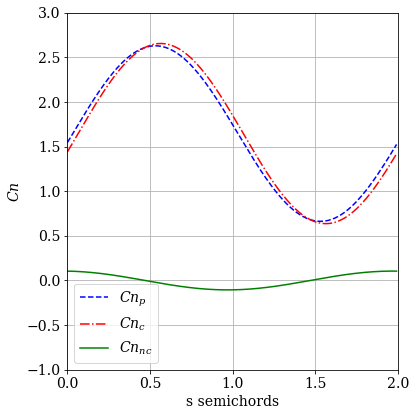

In [16]:
# plot figure
plt.rcParams.update({'font.size': 14}) #, 'figure.dpi':150, 'savefig.dpi':150})
plt.rcParams["font.family"] = "serif" # define font
plt.rcParams["mathtext.fontset"] = "dejavuserif" # define font
cmap = plt.get_cmap('BuGn') # define colormap
fig,ax = plt.subplots(figsize=[6,6]) # define pointers for figure and axes


#we will only plot the last cycle
Ncycles = np.floor(time[-1]*omega/(2*np.pi)) # determine number of cycles
n_of_cycle = time*omega/(2*np.pi) # calculate the phase of the different points of the cycle
i1=np.argmin(np.abs(n_of_cycle-(Ncycles-1))) # index of start of cycle plotted
i2=np.argmin(np.abs(n_of_cycle-(Ncycles-.5))) # index of 180 degrees
i3=np.argmin(np.abs(n_of_cycle-(Ncycles))) # index of 360 degrees

# plot last cycle of the simulation, normal force coefficient  
ax.plot(time2semichord(n_of_cycle[i1:i3]-n_of_cycle[i1]), 
        Cnormal_p[i1:i3],color='blue',linestyle='--', label=r'$Cn_{p}$')
ax.plot(time2semichord(n_of_cycle[i1:i3]-n_of_cycle[i1]), 
        Cnormal_circ[i1:i3],color='red',linestyle='-.', label=r'$Cn_{c}$')
ax.plot(time2semichord(n_of_cycle[i1:i3]-n_of_cycle[i1]), 
        Cnormal_noncirc[i1:i3],color='green',linestyle='-', label=r'$Cn_{nc}$')
ax.set_xlabel('s semichords') # set x-label
ax.set_ylabel(r'$Cn$') # set y-label
ax.set_xlim(0,2) # define limits of the axis
ax.set_ylim(-1,3) # define limits of the axis
ax.grid() # add grid
ax.legend(loc='lower left')
plt.tight_layout() # all elements of figure inside plot area

plt.show() # show figure



filename = 'figures/comparison_Cn_p_circ_noncirc' # define name of the figure to be saved
fig.savefig(filename+'.svg', pad_inches = 0.) # save figure
fig.savefig(filename+'.pdf',pad_inches = 0.) # save figure
fig.savefig(filename+'.png', pad_inches = 0., dpi=300) # save figure

The figure above shows the potential flow normal load coefficient in unsteady flow $Cn_{p}$, and its circulatory $Cn_c$ and non-circulatory $Cn_{nc}$ components.

We now publish the result above as a function of angle of attack.

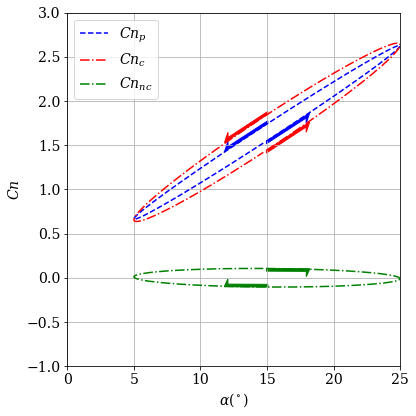

In [17]:
# plot figure
plt.rcParams.update({'font.size': 14}) #, 'figure.dpi':150, 'savefig.dpi':150})
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
cmap = plt.get_cmap('BuGn')
fig,ax = plt.subplots(figsize=[6,6])

#we will only plot the last cycle
Ncycles = np.floor(time[-1]*omega/(2*np.pi))
n_of_cycle = time*omega/(2*np.pi) # calculate the phase of the different points of the cycle
i1=np.argmin(np.abs(n_of_cycle-(Ncycles-1))) # index of start of cycle plotted
i2=np.argmin(np.abs(n_of_cycle-(Ncycles-.5))) # index of 180 degrees
i3=np.argmin(np.abs(n_of_cycle-(Ncycles))) # index of 360 degrees


ax.plot(alpha[i1:i3]*180/np.pi, 
        Cnormal_p[i1:i3],color='blue',linestyle='--', label=r'$Cn_{p}$')
ax.plot(alpha[i1:i3]*180/np.pi, 
        Cnormal_circ[i1:i3],color='red',linestyle='dashdot', label=r'$Cn_{c}$')
ax.plot(alpha[i1:i3]*180/np.pi, 
        Cnormal_noncirc[i1:i3],color='green',linestyle='dashdot', label=r'$Cn_{nc}$')

# we will plot arrows to see the direction of the cycle
scale_arrow=3 # scale od arrow
dx = (alpha[i1]-alpha[i1-1])*180/np.pi # dx of arrow
dy = Cnormal_p[i1]-Cnormal_p[i1-1]  # dy of arrow   
ax.arrow(alpha[i1]*180/np.pi, Cnormal_p[i1], 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='blue', width=scale_arrow*.02,shape='left') # plot arrow at 0 degrees of cycle
dx = (alpha[i2]-alpha[i2-1])*180/np.pi # dx of arrow
dy = Cnormal_p[i2]-Cnormal_p[i2-1]  # dy of arrow   
ax.arrow(alpha[i2]*180/np.pi, Cnormal_p[i2], 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='blue', width=scale_arrow*.02,shape='left') # plot arrow at 0 degrees of cycle


dx = (alpha[i1]-alpha[i1-1])*180/np.pi # dx of arrow
dy = Cnormal_circ[i1]-Cnormal_circ[i1-1]  # dy of arrow      
ax.arrow(alpha[i1]*180/np.pi, Cnormal_circ[i1], 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='red', width=scale_arrow*.02, shape='left') # plot arrow at 0 degrees of cycle
dx = (alpha[i2]-alpha[i2-1])*180/np.pi # dx of arrow
dy = Cnormal_circ[i2]-Cnormal_circ[i2-1]  # dy of arrow   
ax.arrow(alpha[i2]*180/np.pi, Cnormal_circ[i2], 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='red', width=scale_arrow*.02, shape='left') # plot arrow at 0 degrees of cycle

dx = (alpha[i1]-alpha[i1-1])*180/np.pi # dx of arrow
dy = Cnormal_noncirc[i1]-Cnormal_noncirc[i1-1]  # dy of arrow      
ax.arrow(alpha[i1]*180/np.pi, Cnormal_noncirc[i1], 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='green', width=scale_arrow*.02, shape='left') # plot arrow at 0 degrees of cycle
dx = (alpha[i2]-alpha[i2-1])*180/np.pi # dx of arrow
dy = Cnormal_noncirc[i2]-Cnormal_noncirc[i2-1]  # dy of arrow   
ax.arrow(alpha[i2]*180/np.pi, Cnormal_noncirc[i2], 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='green', width=scale_arrow*.02, shape='left') # plot arrow at 0 degrees of cycle

# ax.set_aspect(aspect=40.0)
ax.set_xlabel(r'$\alpha (^\circ)$')
ax.set_ylabel(r'$Cn$')
ax.set_ylim(-1,3)
ax.set_xlim(0,25)

ax.legend(loc='upper left')
plt.grid()

plt.tight_layout() # all elements of figure inside plot area

plt.show()

filename = 'figures/comparison_cycle_Cn_p_circ_noncirc' # define name of the figure to be saved
fig.savefig(filename+'.svg', pad_inches = 0.) # save figure
fig.savefig(filename+'.pdf',pad_inches = 0.) # save figure
fig.savefig(filename+'.png', pad_inches = 0., dpi=300) # save figure


## Non-linear trailing-edge separation module

In attached flow, the loss of lift slope due to viscous effects is accounted by taking the lift slope of a potential flow flat plate. However, trailing edge separation will lead to a more significant loss of lift slope. This module aims at account for this effect. 

In the Beddoes Leishman model, the trailing edge flow separation is modelled using the Kirchhoff and Helmholtz Theory that expresses the separated normal force as a function of the attached lift slope, the angle of attack and a function of a pseudo-location of the separation point over the airfoil section $f_{sep}$, which varies from $f_{sep}=1$ at the trailing edge to $f_{sep}=0$ at the leading edge. The expression for the non-linear normal force coefficient in steady flow $C_{n_{st}}$ including trailing-edge separation is then given by

\begin{equation}
C_{n_{st}}= \frac{\rm{d} C_l}{\rm{d}\alpha} \left( \frac{1+\sqrt{f}}{2} \right)^2 \left( \alpha - \alpha_0 \right)
\end{equation}

The function $f$ can be retrieved from steady experimental data or viscous simulations, or defined based on characteristics of the airfoil. It can then be defined as a function of the angle of attack $f_{\left( \alpha \right)}$.

In unsteady flow, the separation experiences a lag due to the leading-edge pressure lag and boundary-layer development lag. These two sources of lag are modelled in two consecutive steps.

The leading-edge pressure lag aims at determining an equivalent angle of attack of a lagged loading that produces a similar leading-edge pressure. The first step is to calculate a lagged potential flow load $C_{n_{P^,}}$, and then determine the equivalent angle of attack $\alpha_f$. The following equation are the solved, including the integration of the deficit function $D_{pf}$.

\begin{align}
C_{n_{P^,}}=C_{n_{P}}-D_{pf} \\
D_{pf \left(s\right)} =D_{pf \left(s-\Delta s\right)} e^{\frac{-\Delta s}{T_p}}+
\left(C_{n_P \left(s\right)} -C_{n_P \left(s-\Delta s\right)} \right)e^{\frac{-\Delta s}{2 T_p}}\\
\alpha_f=\frac{C_{n_{P^,}}}{\frac{\rm{d} C_l}{\rm{d}\alpha}}+\alpha_0\\
f_{p}=f_{\left( \alpha_f \right)}
\end{align}

$T_p$ is mostly dependent on Mach number and in small amount in airfoil shape. For a reference, in our simulations we will use a value of $T_p=1.7$.

The boundary-layer development lag aims at calculating a second separation position function $f_{bl}$ dependent on a boundary-layer development deficit function $D_{bl}$.

\begin{align}
f_{bl}=f_{p}-D_{bl} \\
D_{bl \left(s\right)} =D_{bl \left(s-\Delta s\right)} e^{\frac{-\Delta s}{T_f}}+
\left(f_{p \left(s\right)} -f_{p \left(s-\Delta s\right)} \right)e^{\frac{-\Delta s}{2 T_f}}\\
\end{align}

$T_f$ is dependent on airfoil shape. For a reference, in our simulations we will use a value of $T_f=3.0$.
 
The unsteady non-linear normal force coefficient including trailing edge separation is given by:


\begin{equation}
C_{n_f \left(s\right)} = \frac{\rm{d} C_l}{\rm{d}\alpha}\left( \frac{1+\sqrt{f_{bl}}}{2} \right)^2\left(\alpha_{E \left(s\right)} - \alpha_0 \right)+ C_{n_{nc}\left(s\right)}
\end{equation}


In the code block below, we define a separation function to create a synthetic viscous polar.

In [18]:
# definition of a function for the trailing edge separation point "f"

def f_trailing_edge_separation_point(alpha, a1=7,a2=15,a3=21):
    # receives alpha in radians, converts to degrees
    alphadeg = alpha*180/np.pi
    if alphadeg<=a1:
        f=1
    elif ((alphadeg>a1) and (alphadeg<=a2)):
        f= 1 - .8*((alphadeg-a1)/(a2-a1))
    elif ((alphadeg>a2) and (alphadeg<a3)):
        f= .2 *(1- ((alphadeg-a2)/(a3-a2))**.3)
    else:
        f=0
    return f


We now use the artificial viscous polar to calculate the viscous steady solution of the normal force coefficient $Cn_{st}$

In [19]:
# test polar with trailing edge separation point "f"
alpha_polar=np.arange(-5,30,.1)
CNsep=np.zeros(np.shape(alpha_polar))
for i,val in enumerate(alpha_polar):
    CNsep[i]= dCn_dalpha*(((1+np.sqrt(f_trailing_edge_separation_point(alpha_polar[i]*np.pi/180)))/2)**2)*(alpha_polar[i]*np.pi/180-alpha0)
# we will also calculate the steady value of Cn to compare with later results
CNsteady=np.zeros(np.shape(time))
for i,val in enumerate(time):
    CNsteady[i]= dCn_dalpha*(((1+np.sqrt(f_trailing_edge_separation_point(alpha[i])))/2)**2)*(alpha[i]-alpha0)



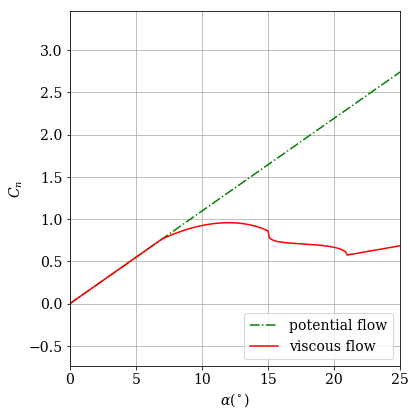

In [20]:
# plot figure
plt.rcParams.update({'font.size': 14}) #, 'figure.dpi':150, 'savefig.dpi':150})
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
cmap = plt.get_cmap('BuGn')
fig,ax = plt.subplots(figsize=[6,6])
ax.plot(alpha_polar, dCn_dalpha*(alpha_polar*np.pi/180-alpha0),color='green',linestyle='dashdot', label=r'potential flow')
ax.plot(alpha_polar, CNsep,color='red',linestyle='-', label=r'viscous flow')
# ax.set_aspect(aspect=40.0)
ax.set_xlabel(r'$\alpha (^\circ)$')
ax.set_ylabel(r'$C_n$')
ax.set_xlim(0,25)
ax.legend(loc='lower right')

plt.tight_layout() # all elements of figure inside plot area

plt.grid()


plt.show()

The figure below show the potential flow and viscous flow polars.

### Pressure lag effect and boundary layer development effect for delaying separation point

We will now determine the effect of the pressure lag in terms of onset of the separation point

In [21]:
# we will now determine the effect of the pressure lag in terms of onset of the separation point

def pressure_lag_deficiency(Dpress_i,delta_s, delta_CNpot, Tp=1.7):
    return Dpress_i*np.exp(-delta_s/Tp)+ delta_CNpot*np.exp(-delta_s/2/Tp) 
    
# we need to define an array for the pressure lag deficiency function
Dpress = np.zeros(np.shape(time))

# we will now do the time marching to solve for the pressure lag deficiency function 
for i,val in enumerate(time[:-1]):
    Dpress[i+1] = pressure_lag_deficiency(Dpress[i],sarray[i+1]-sarray[i], Cnormal_p[i+1]-Cnormal_p[i])

# we now determine the normal force coefficient due to the pressure lag
Cnormal_prime = Cnormal_p-Dpress

# an based on this Cnormal_prime, we determine a new equivalent angle of attack 
# to determine the onset of trailing edge separation
alpha_f = Cnormal_prime/dCn_dalpha+alpha0

# we use this equivalent angle of attack alpha_f to determine a new trailign edge separation point effect f_prime
fprime = np.zeros(np.shape(time))
for i,val in enumerate(time):
    fprime[i]  = f_trailing_edge_separation_point(alpha_f[i])
    

We will now plot the effect the lag on determining a new equivalent angle of attack

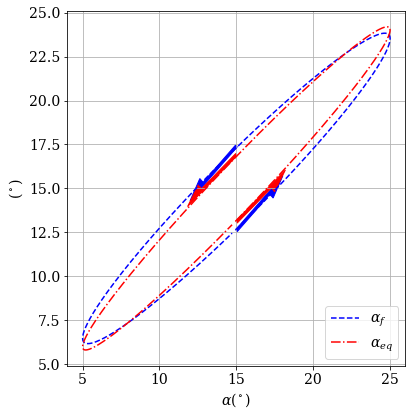

In [22]:
# plot figure
plt.rcParams.update({'font.size': 14}) #, 'figure.dpi':150, 'savefig.dpi':150})
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
cmap = plt.get_cmap('BuGn')
fig,ax = plt.subplots(figsize=[6,6])

#we will only plot the last cycle
Ncycles = np.floor(time[-1]*omega/(2*np.pi))
n_of_cycle = time*omega/(2*np.pi) # calculate the phase of the different points of the cycle
i1=np.argmin(np.abs(n_of_cycle-(Ncycles-1))) # index of start of cycle plotted
i2=np.argmin(np.abs(n_of_cycle-(Ncycles-.5))) # index of 180 degrees
i3=np.argmin(np.abs(n_of_cycle-(Ncycles))) # index of 360 degrees


ax.plot(alpha[i1:i3]*180/np.pi, alpha_f[i1:i3]*180/np.pi,color='blue',linestyle='--', label=r'$\alpha_{f}$')
ax.plot(alpha[i1:i3]*180/np.pi, alpha_equivalent[i1:i3]*180/np.pi,color='red',linestyle='dashdot', label=r'$\alpha_{eq}$')


# we will plot arrows to see the direction of the cycle
scale_arrow=3 # scale od arrow
dx = (alpha[i1]-alpha[i1-1]) # dx of arrow
dy = (alphaqs[i1]-alphaqs[i1-1])  # dy of arrow   
ax.arrow(alpha[i1]*180/np.pi, alpha_f[i1]*180/np.pi, 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='blue', width=scale_arrow*.1, shape='left') # plot arrow at 0 degrees of cycle
dx = (alpha[i2]-alpha[i2-1]) # dx of arrow
dy = (alphaqs[i2]-alphaqs[i2-1])  # dy of arrow   
ax.arrow(alpha[i2]*180/np.pi, alpha_f[i2]*180/np.pi, 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='blue', width=scale_arrow*.1, shape='left') # plot arrow at 0 degrees of cycle


dx = (alpha[i1]-alpha[i1-1]) # dx of arrow
dy = (alpha_equivalent[i1]-alpha_equivalent[i1-1])  # dy of arrow   
ax.arrow(alpha[i1]*180/np.pi, alpha_equivalent[i1]*180/np.pi, 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='red', width=scale_arrow*.1, shape='left') # plot arrow at 0 degrees of cycle
dx = (alpha[i2]-alpha[i2-1]) # dx of arrow
dy = (alpha_equivalent[i2]-alpha_equivalent[i2-1])  # dy of arrow   
ax.arrow(alpha[i2]*180/np.pi, alpha_equivalent[i2]*180/np.pi, 
             scale_arrow*dx/np.sqrt(dx**2+dy**2) , scale_arrow*dy/np.sqrt(dx**2+dy**2),
              color='red', width=scale_arrow*.1, shape='left') # plot arrow at 0 degrees of cycle

# ax.set_aspect(aspect=40.0)
ax.set_xlabel(r'$\alpha (^\circ)$')
ax.set_ylabel(r'$ (^\circ)$')
# ax.set_xlim(0,time.max())
ax.legend(loc='lower right')
plt.grid()

plt.tight_layout() # all elements of figure inside plot area

plt.show()

filename = 'figures/comparison_cycle_alpha_circ_f' # define name of the figure to be saved
fig.savefig(filename+'.svg', pad_inches = 0.) # save figure
fig.savefig(filename+'.pdf',pad_inches = 0.) # save figure
fig.savefig(filename+'.png', pad_inches = 0., dpi=300) # save figure


We will now implement a delay function for separation point for boundary layer lag effects

In [23]:
## we will now implement a delay function for separation point for boundary layer lag effects

def boundary_layer_lag_deficiency(Dbl_i,delta_s, delta_fprime, Tf=3.0):
    return Dbl_i*np.exp(-delta_s/Tf)+ delta_fprime*np.exp(-delta_s/2/Tf) 
    
# we need to define an array for the boundary layer lag deficiency function
Dbl = np.zeros(np.shape(time))

# we will now do the time marching to solve for the boundary layer lag deficiency function 
for i,val in enumerate(time[:-1]):
    Dbl[i+1] = boundary_layer_lag_deficiency(Dbl[i],sarray[i+1]-sarray[i], fprime[i+1]-fprime[i])

# we now determine the a new expression of fprimeprime due to the boundary layer lag
fprimeprime = fprime-Dbl


We can now determine the normal force due to trailing edge boundary layer separation

In [24]:
## we can now determine the normal force due to trailing edge boundary layer separation

Cnormal_f = dCn_dalpha*((1+np.sqrt(fprimeprime))/2)**2*(alpha_equivalent-alpha0)+ Cnormal_noncirc




We can now determine the normal force coefficient due to trailing edge boundary layer separation, comparing it with the other terms

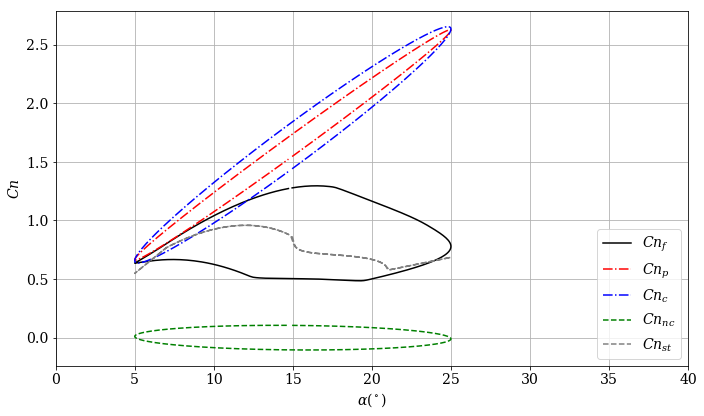

In [25]:

# plot figure
plt.rcParams.update({'font.size': 14}) #, 'figure.dpi':150, 'savefig.dpi':150})
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
cmap = plt.get_cmap('BuGn')


#we will only plot the last cycle
Ncycles = np.floor(time[-1]*omega/(2*np.pi))
n_of_cycle = time*omega/(2*np.pi) # calculate the phase of the different points of the cycle
i1=np.argmin(np.abs(n_of_cycle-(Ncycles-1))) # index of start of cycle plotted
i2=np.argmin(np.abs(n_of_cycle-(Ncycles-.5))) # index of 180 degrees
i3=np.argmin(np.abs(n_of_cycle-(Ncycles))) # index of 360 degrees


fig,ax = plt.subplots(figsize=[10,6])
ax.plot(alpha[i1:i3]*180/np.pi, Cnormal_f[i1:i3],color='black',linestyle='-', label=r'$Cn_f$')
ax.plot(alpha[i1:i3]*180/np.pi, Cnormal_p[i1:i3],color='red',linestyle='dashdot', label=r'$Cn_p$')
ax.plot(alpha[i1:i3]*180/np.pi, Cnormal_circ[i1:i3],color='blue',linestyle='-.', label=r'$Cn_{c}$')
ax.plot(alpha[i1:i3]*180/np.pi, Cnormal_noncirc[i1:i3],color='green',linestyle='--', label=r'$Cn_{nc}$')
ax.plot(alpha[i1:i3]*180/np.pi, CNsteady[i1:i3],color='grey',linestyle='--', label=r'$Cn_{st}$')
# ax.set_aspect(aspect=40.0)
ax.set_xlabel(r'$\alpha (^\circ)$')
ax.set_ylabel(r'$Cn$')
ax.set_xlim(0,40)
ax.legend(loc='lower right')
plt.grid()

plt.tight_layout() # all elements of figure inside plot area

plt.show()

filename = 'figures/comparison_cycle_Cn_f_p_circ_noncirc_st' # define name of the figure to be saved
fig.savefig(filename+'.svg', pad_inches = 0.) # save figure
fig.savefig(filename+'.pdf',pad_inches = 0.) # save figure
fig.savefig(filename+'.png', pad_inches = 0., dpi=300) # save figure


### Leading Edge SeparationModule

In steady flow, it is possible to establish a relation between the onset of leading edge stall and a leading edge pressure gradient. This leading edge pressure gradient can be associated to a certain value of normal load. 	

Once this leading edge vortex occurs, it convect over the surface of the airfoil at a fraction of $U_\infty$. If we assume constant speed, then the location over the airfoil and wake is equivalent to a reduced time $\tau_v$. We define that $\tau_v$ starts its counting when while $\alpha_E$ increases and $C_{n_f}$ crosses a certain critical value $C_{n_1}$. $\tau_v$ is reset to zero in the next cycle when once $\alpha_E$ increases and $C_{n_f}<C_{n_1}$. If we assume that the vortex convects with $0.45 U_\infty$, then the counter $\tau_v$ can be expressed by the equation

\begin{equation}
\label{eq:BL_vortex_travelling_tau}
\tau_{v \left(s\right)}=\left\{\begin{array}{ll}
\tau_{v \left(s-\Delta s\right)} +0.45 \Delta s & \rm{if~} C_{n_f}>C_{n_1} or \tau>0 \\ 
 0 & \rm{if~} C_{n_f}<C_{n_1} \rm{~ and ~} \Delta \alpha_E >0 
\end{array}\right.
\end{equation}




### Vortex shedding module

The leading-edge vortex causes and augmentation of the normal as the vortex travels over the surface of the airfoil lift augments the lift (normal force coefficient), a process that remains also as the vortex is convected downstream.  The impact of the vortex increases as it convects over the surface of the airfoil, but decreases a it convects over the wake.
 
The contribution by the vortex lift is determined by two equations. First, we define the forcing term

\begin{equation}
C_{v \left(s\right)} = C_{n_{P} \left(s\right)} \left( 1 - \left( \frac{1+\sqrt{f_{bl}}}{2} \right)^2  \right) 
\end{equation}

The vortex lift is determined by marching in time the solution of the following equation:

\begin{equation}
\label{eq:BL_cn_vortex}
\begin{array}{ll}
C_{n_v  \left(s\right)}=C_{n_v  \left(s-\Delta s\right)}e^{\frac{-\Delta s}{T_v}}+
\left(C_{v \left(s\right)} -C_{v \left(s-\Delta s\right)} \right)e^{\frac{-\Delta s}{2 T_v}} &
\text{if } 0<\tau_v<T_{vl}  \\
C_{n_v  \left(s\right)}=C_{n_v  \left(s-\Delta s\right)}e^{\frac{-\Delta s}{T_v}} &
 \text{else}
\end{array}
\end{equation}

For a reference, in our simulations we will use a value of $T_v=6.0$ and $T_vl=5.0$.

The code-bloks below calculate the effect of the leading edge vortex.


In [26]:
# we will now setup the non-dimensional vortex-time parameter vortime
# we will setup an equation for vortime, integrating in time

def vortime_function(vortime_i,delta_s,delta_alphaqs, Cnormal_prime, CN1=1.0093):
    if Cnormal_prime>CN1:
        vortime_ip1 = vortime_i + 0.45*delta_s
    else:
        if (delta_alphaqs<0 and vortime_i>0):
            vortime_ip1 = vortime_i + 0.45*delta_s
        else:
            vortime_ip1 = 0 
    
    return vortime_ip1



# we need to define an array for the non-dimensional vortex-time parameter vortime
vortime = np.zeros(np.shape(time))

# we will now do the time marching to solve for the non-dimensional vortex-time parameter vortime
for i,val in enumerate(time[:-1]):
    vortime[i+1] = vortime_function(vortime[i],sarray[i+1]-sarray[i],dalphaqs_dt[i], Cnormal_prime[i])


# # plot figure
# plt.rcParams.update({'font.size': 14}) #, 'figure.dpi':150, 'savefig.dpi':150})
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["mathtext.fontset"] = "dejavuserif"
# cmap = plt.get_cmap('BuGn')
# fig,ax = plt.subplots(figsize=[6,6])
# ax.plot(time, vortime,color='black',linestyle='-', label=r'$\tau_v$')
# # ax.set_aspect(aspect=40.0)
# secax = ax.secondary_xaxis('top', functions=(time2semichord, semichord2time))
# secax.set_xlabel('s semichords')
# ax.set_xlabel(r'$t_{(s)}$')
# ax.set_ylabel(r'$\tau_v$')
# # ax.set_xlim(0,time.max())
# ax.legend(loc='lower right')
# plt.grid()


# plt.show()




In [27]:

## we will now define the added normal force due to the presence of the leading edge vortex

# first, we determine the increment in normal force due to the presence of a vortex 'Cvortex' as a function 
# of the circulatory normal force and the separation location

Cvortex=Cnormal_circ*(1 - ( ((1+np.sqrt(fprimeprime))/2)**2  ) )

# we will now define the function for decay of the cumulative normal force due to the presence of the leading edge vortex

def leading_edge_vortex_normal_force(Cnormal_vortex_i,delta_s,delta_Cvortex,vortime,TVL=11,TV=6):
    if (vortime>0.001 and vortime<TVL):
        Cnormal_vortex_ip1=Cnormal_vortex_i*np.exp(-delta_s/TV)+ delta_Cvortex*np.exp(-delta_s/2/TV)      
    else:    
        Cnormal_vortex_ip1=Cnormal_vortex_i*np.exp(-delta_s/TV) 
    return Cnormal_vortex_ip1

# We will now solve for the cumulative normal force due to the leadign edge vortex by marching in time.
# First, we will define the array

Cnormal_vortex = np.zeros(np.shape(time))
Cnormal_vortex[0]=Cvortex[0]

for i,val in enumerate(time[:-1]):
    Cnormal_vortex[i+1] = leading_edge_vortex_normal_force(Cnormal_vortex[i],sarray[i+1]-sarray[i], 
                                                           Cvortex[i+1]-Cvortex[i],vortime[i])





## Calculating the total normal force coefficient

We can now add the contribution by the leading edge vortex to the result of the unsteady separated flow.

In [28]:
# calculating total load

Cnormal_total = Cnormal_f + Cnormal_vortex


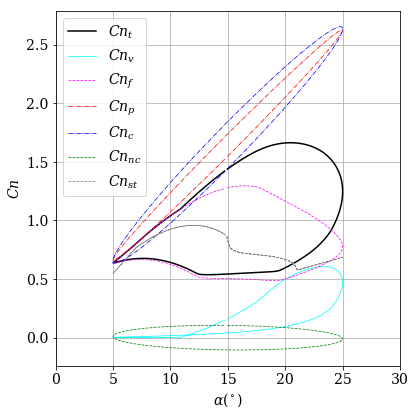

In [29]:
# plot figure
plt.rcParams.update({'font.size': 14}) #, 'figure.dpi':150, 'savefig.dpi':150})
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
cmap = plt.get_cmap('BuGn')


#we will only plot the last cycle
Ncycles = np.floor(time[-1]*omega/(2*np.pi))
n_of_cycle = time*omega/(2*np.pi) # calculate the phase of the different points of the cycle
i1=np.argmin(np.abs(n_of_cycle-(Ncycles-1))) # index of start of cycle plotted
i2=np.argmin(np.abs(n_of_cycle-(Ncycles-.5))) # index of 180 degrees
i3=np.argmin(np.abs(n_of_cycle-(Ncycles))) # index of 360 degrees


fig,ax = plt.subplots(figsize=[6,6])
ax.plot(alpha[i1:i3]*180/np.pi, Cnormal_total[i1:i3],color='black',linestyle='-', linewidth=1.5, label=r'$Cn_t$')
ax.plot(alpha[i1:i3]*180/np.pi, Cnormal_vortex[i1:i3],color='cyan',linestyle='-',linewidth=.75, label=r'$Cn_v$')
ax.plot(alpha[i1:i3]*180/np.pi, Cnormal_f[i1:i3],color='magenta',linestyle='--',linewidth=.75, label=r'$Cn_f$')
ax.plot(alpha[i1:i3]*180/np.pi, Cnormal_p[i1:i3],color='red',linestyle='dashdot',linewidth=.75, label=r'$Cn_p$')
ax.plot(alpha[i1:i3]*180/np.pi, Cnormal_circ[i1:i3],color='blue',linestyle='-.',linewidth=.75, label=r'$Cn_{c}$')
ax.plot(alpha[i1:i3]*180/np.pi, Cnormal_noncirc[i1:i3],color='green',linestyle='--',linewidth=.75, label=r'$Cn_{nc}$')
ax.plot(alpha[i1:i3]*180/np.pi, CNsteady[i1:i3],color='grey',linestyle='--',linewidth=.75, label=r'$Cn_{st}$')
# ax.set_aspect(aspect=40.0)
ax.set_xlabel(r'$\alpha (^\circ)$')
ax.set_ylabel(r'$Cn$')
ax.set_xlim(0,30)
ax.legend(loc='upper left')
plt.grid()

plt.tight_layout() # all elements of figure inside plot area

plt.show()

filename = 'figures/comparison_cycle_Cn_t_v_f_p_circ_noncirc_st' # define name of the figure to be saved
fig.savefig(filename+'.svg', pad_inches = 0) # save figure
fig.savefig(filename+'.pdf',pad_inches = 0) # save figure
fig.savefig(filename+'.png', pad_inches = 0, dpi=300) # save figure




## Plot identifying the mechanisms of dynamic stall

Here we create a plot identifying the moments of the dynamic stall process

In [30]:
Ncycles = np.floor(time[-1]*omega/2/np.pi)
# print('Number of cycles ',Ncycles)
ind1=np.argmin(np.abs((time*omega/2/np.pi)-(Ncycles-1)))
ind2=np.argmin(np.abs((time*omega/2/np.pi)-Ncycles))+1

In [31]:
alphacycle=alpha[ind1:ind2]
Cncycle=Cnormal_total[ind1:ind2]
timecycle=time[ind1:ind2]
fprimeprimecycle=fprimeprime[ind1:ind2]

# determine point of trailing edge separation
i1= np.where(fprimeprime[ind1:ind2]>.99)
i1= np.where(alphacycle == np.max(alphacycle[i1]))
p1 = [alphacycle[i1]*180/np.pi, Cncycle[i1]]
#print(p1)

# determine point leading edge separation
i2= np.where(vortime[ind1:ind2]<.01)
i2= np.where(alphacycle == np.max(alphacycle[i2]))
p2 = [alphacycle[i2]*180/np.pi, Cncycle[i2]]
# print(p2)


# determine point of leading edge vortex shed in the wake and contribution due to the leading-edge vortex starts to decay
i3= np.where(Cnormal_vortex[ind1:ind2]==np.max(Cnormal_vortex[ind1:ind2]))
i3= np.where(alphacycle == np.max(alphacycle[i3]))
p3 = [alphacycle[i3]*180/np.pi, Cncycle[i3]]
# print(p2)



# determine point where contribution by leading edge vortex is small, the flow is dominated by the trailing edge separation
i4= np.where(Cnormal_vortex[ind1:ind2]<0.05)
i4= np.where(alphacycle == np.max(alphacycle[i4]))
p4 = [alphacycle[i4]*180/np.pi, Cncycle[i4]]
# print(p4)


# determine point of reattachment of the flow
i5= np.where(np.gradient(alpha[ind1:ind2])<0)
# print(i6[0][-1])
i5= np.where(fprimeprimecycle[0:i5[0][-1]]<0.95)
# print(i6)
p5 = [alphacycle[i5[0][-1]]*180/np.pi, Cncycle[i5[0][-1]]]
# print(p5)



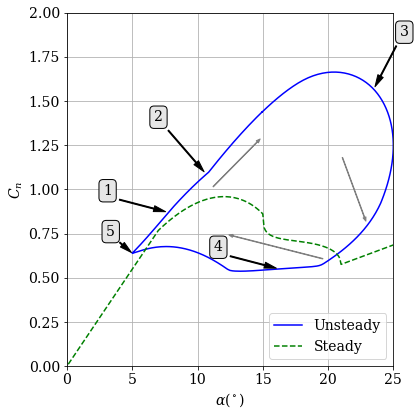

In [32]:


# plot figure
plt.rcParams.update({'font.size': 14}) #, 'figure.dpi':150, 'savefig.dpi':150})
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
cmap = plt.get_cmap('BuGn')
fig,ax = plt.subplots(figsize=[6,6])
ax.plot(alpha[ind1:ind2]*180/np.pi, Cnormal_total[ind1:ind2],color='blue',linestyle='-', label=r'Unsteady')
ax.plot(alpha_polar, CNsep,color='green',linestyle='--', label=r'Steady')
# ax.set_aspect(aspect=40.0)
ax.set_xlabel(r'$\alpha (^\circ)$')
ax.set_ylabel(r'$C_n$')
ax.set_xlim(0,25)
ax.set_ylim(0,2.0)
ax.legend(loc='lower right')
plt.grid()

# annotate dynamic stall points
bbox = dict(boxstyle="round", fc="0.9")
p1an=ax.annotate('1', xy=(p1[0], p1[1]), xytext=(p1[0]-5, p1[1]+.1),bbox=bbox,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6))
p2an=ax.annotate('2', xy=(p2[0], p2[1]), xytext=(p2[0]-4, p2[1]+.3),bbox=bbox,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6))
p3an=ax.annotate('3', xy=(p3[0], p3[1]), xytext=(p3[0]+2, p3[1]+.3),bbox=bbox,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6))
p4an=ax.annotate('4', xy=(p4[0], p4[1]), xytext=(p4[0]-5, p4[1]+.1),bbox=bbox,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6))
p5an=ax.annotate('5', xy=(p5[0], p5[1]), xytext=(p5[0]-2, p5[1]+.1),bbox=bbox,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6))

parr1=ax.annotate('', xy=(15, 1.3), xytext=(11,1),
            arrowprops=dict(color='grey', shrink=0.05, width=.5, headwidth=3,headlength=4))
parr2=ax.annotate('', xy=(23, 0.8), xytext=(21,1.2),
            arrowprops=dict(color='grey', shrink=0.05, width=.5, headwidth=3,headlength=4))
parr3=ax.annotate('', xy=(12, 0.75), xytext=(20,0.6),
            arrowprops=dict(color='grey', shrink=0.05, width=.5, headwidth=3,headlength=4))

plt.tight_layout() # all elements of figure inside plot area
plt.show()


filename = 'figures/dynamic_stall_cycle'
fig.savefig(filename+'.svg', pad_inches = 0) # save figure
fig.savefig(filename+'.pdf',pad_inches = 0) # save figure
fig.savefig(filename+'.png', pad_inches = 0, dpi=300) # save figure



The figure above presents the loop  unsteady normal-force coefficient  for the case of a flat plate pitching in a sinusoidal motion $\alpha=5^\circ \sin(\omega t)+15^\circ$, with $\omega=k\frac{2 c}{Uinf}$, with $k=0.1$. The pitching axis is at the quarter-chord. The plot is compared with the steady polar. Five points over the dynamic stall cycle are plotted: 1) start of trailing edge separation; 2)  start of leading edge separation; 3) point when the leading-edge vortex is shed in the wake and the contribution due to leading edge vortex starts to decay; 4) point where the contribution by the leading edge vortex is small, and the loading is dominated by the trailing edge separation; and 5) flow reattachment. 